Lifecycle of a Data Science Projects

Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys

Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information

Survey informations are not that valid

Men--salary

Women---age

People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

# Types of missing data

### 1. What are diffrent types of missing data.

#### MCAR(missing completely at random)

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations.
When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, 
within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic
going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


This is an perfect example of MCAR because these two values are completely missing at random with no relation

### MISSING DATA NOT AT RANDOM (MNAR)

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [6]:
import numpy as np

In [7]:
df['cabin_x'] = np.where(df['Cabin'].isnull(),1,0)

In [8]:
df['cabin_x'].mean()

0.7710437710437711

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_x
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_x'],
      dtype='object')

In [11]:
df['cabin_x']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_x, Length: 891, dtype: int32

In [12]:
df.groupby(['Survived'])['cabin_x'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_x, dtype: float64

# MISSING AT RANDOM (MAR)

Men --- hide their salary

Women --- hide their age

techniques used to handle the missing values are --

1. mean/median/mode replacement
2. random sample imputation
3. capturing NAN values with an new feature
4. end of distribution imputation
5. arbitrary imputation
6. frequent category imputation


## mean/median/mode replacement

In [13]:
# basically it is used in MCAR and it replaces the NAN values by some basic occurences like mean,mode and median.

import pandas as pd

In [14]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [16]:
def impute_nan(df,variable,median):
    df[variable+'median'] = df[variable].fillna(median)

In [17]:
median = df.Age.median()
median

28.0

In [18]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [19]:
df.isnull().mean()

Survived     0.000000
Age          0.198653
Fare         0.000000
Agemedian    0.000000
dtype: float64

In [20]:
print(df['Age'].std())

14.526497332334044


In [21]:
print(df['Agemedian'].std())

13.019696550973194


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

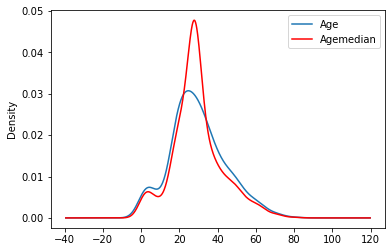

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Agemedian.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Advantages and disadvantages of mean/median imputation

1. easy to implement 
2. faster way to obtain the complete dataset

1. change or distortion in original variance

.

# RANDOM SAMPLE IMPUTATION

Random sample imputation means that taking random observation from the dataset and replace tha NAN values from that random observations.

used in case of MCAR


In [24]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [25]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [27]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0).head(20)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
Name: Age, dtype: float64

In [28]:
def impute__nan(df,variable,median):
    df[variable+'median'] = df[variable].fillna(median)
    df[variable+'random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state =0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'random'] = random_sample

In [29]:
median = df.Age.median()
impute__nan(df,'Age',median)

In [30]:
df.head()

,Survived,Age,Fare,Agemedian,Agerandom
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


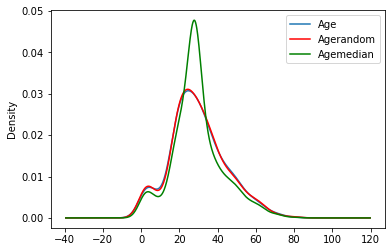

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Agerandom.plot(kind='kde', ax=ax, color='red')
df.Agemedian.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# CAPTURING NAN VALUE WITH  A NEW FEATURE

In [32]:
# it work with data when it is not completely missing at random
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [33]:
df['age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [34]:
df.head(10)

,Survived,Age,Fare,age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [35]:
df['Age'].fillna(df.Age.median(),inplace=True)

# END OF DISTRIBUTION IMPUTATION

In [36]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

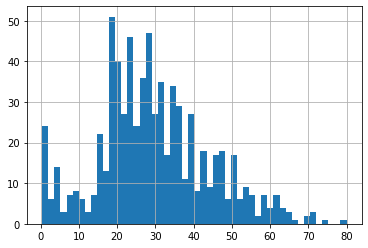

In [37]:
df.Age.hist(bins=50)

In [38]:
extreme= df.Age.mean()+3*df.Age.std()

C:\Users\sid80\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

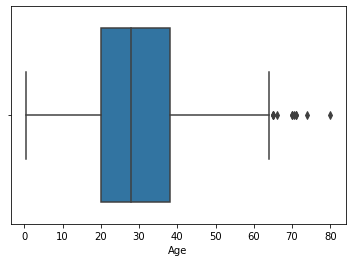

In [39]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [40]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_median'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [41]:
impute_nan(df,'Age',df.Age.median(),extreme) 

In [42]:
df.head(20)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

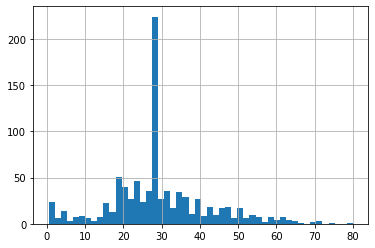

In [43]:
df.Age.hist(bins=50)

<AxesSubplot:>

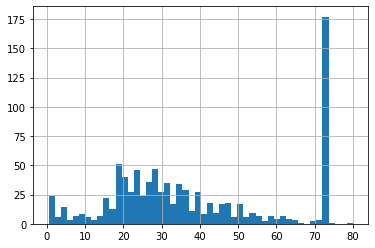

In [44]:
df.Age_median.hist(bins=50)

C:\Users\sid80\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_median'>

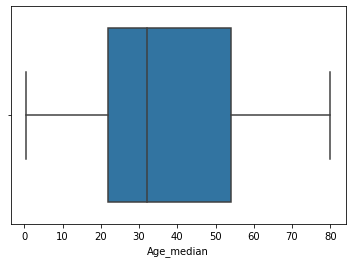

In [45]:
sns.boxplot('Age_median',data=df)

# ARBITRARY VALUE IMPUTATION

In [46]:
#In this the nan value is replaced by some arbitrary values
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
def impute_nan(df,variable):
    df[variable+'_hundred'] = df[variable].fillna(100)

<AxesSubplot:>

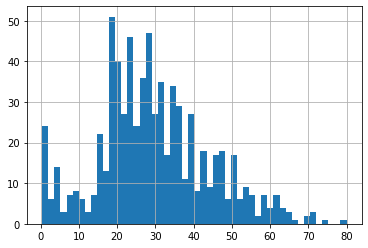

In [48]:
df['Age'].hist(bins=50)

# HOW TO HANDLE CATEGORICAL MISSING VALUES

### FREQUENT CATEGORY IMPUTATION

In [49]:
dff = pd.read_csv('train2.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [50]:
dff.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [51]:
dff.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [52]:
dff.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [53]:
dff.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

## computing the frequency with every feature

<AxesSubplot:xlabel='BsmtQual'>

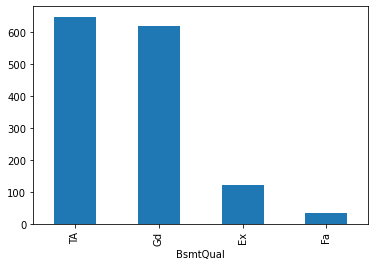

In [54]:
dff.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='GarageType'>

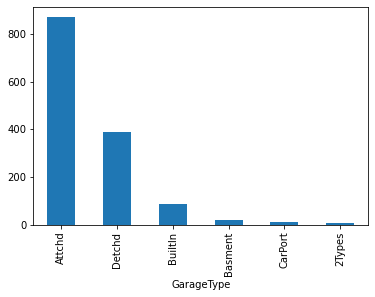

In [55]:
dff.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

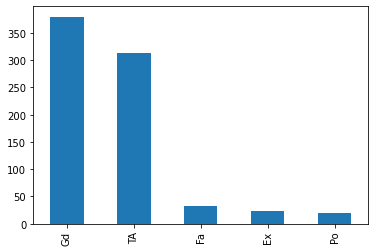

In [56]:
dff['FireplaceQu'].value_counts().plot.bar()

In [57]:
# replacing function
def impute_nan(dff,variable):
    most_frequent_variable = dff[variable].value_counts().index[0]
    dff[variable].fillna(most_frequent_variable,inplace=True)

In [58]:
for features in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(dff,features)

In [59]:
dff.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [60]:
# we can also use mode method in it to take out the most frequent values from it.

## ADDING A VARIABLE TO CAPTURE NAN

In [61]:
dff = pd.read_csv('train2.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [62]:
dff.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [63]:
import numpy as np
dff['BsmtQual_var'] = np.where(dff['BsmtQual'].isnull(),1,0)

In [64]:
dff.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [65]:
frequent = dff['BsmtQual'].mode()[0]

In [66]:
dff['BsmtQual'].fillna(frequent,inplace=True)

In [67]:
dff.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [68]:
dff['FireplaceQu_var'] = np.where(dff['FireplaceQu'].isnull(),1,0)
frequent = dff['FireplaceQu'].mode()[0]
dff['FireplaceQu'].fillna(frequent,inplace=True)
dff.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


Suppose you have more frequent categories than just replace the nan values with a new categories.

In [69]:
def impute_nani(dff,variable):
    dff[variable+'newvar'] = np.where(dff[variable].isnull(),"missing",dff[variable])

In [70]:
dff.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


In [71]:
for features in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nani(dff,features)

In [72]:
dff.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,Gd,Attchd,208500,0,1,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,0,0,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,0,0,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,0,0,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,0,0,Gd,TA,Attchd
5,Gd,Gd,Attchd,143000,0,1,Gd,Gd,Attchd
6,Ex,Gd,Attchd,307000,0,0,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,0,0,Gd,TA,Attchd
8,TA,TA,Detchd,129900,0,0,TA,TA,Detchd
9,TA,TA,Attchd,118000,0,0,TA,TA,Attchd


In [87]:
dff = dff.drop(['BsmtQual', 'FireplaceQu', 'GarageType'],axis=1)

In [88]:
dff.head(10)

,SalePrice,BsmtQual_var,FireplaceQu_var,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,0,1,Gd,Gd,Attchd
1,181500,0,0,Gd,TA,Attchd
2,223500,0,0,Gd,TA,Attchd
3,140000,0,0,TA,Gd,Detchd
4,250000,0,0,Gd,TA,Attchd
5,143000,0,1,Gd,Gd,Attchd
6,307000,0,0,Ex,Gd,Attchd
7,200000,0,0,Gd,TA,Attchd
8,129900,0,0,TA,TA,Detchd
9,118000,0,0,TA,TA,Attchd


# HANDLE CATEGORICAL FEATURES

### ONE HOT ENCODING 

In [75]:
import pandas as pd
df = pd.read_csv('train.csv',usecols=['Sex'])

In [76]:
df.head(20)

,Sex
0,male
1,female
2,female
3,female
4,male
5,male
6,male
7,male
8,female
9,female


In [79]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [80]:
df = pd.read_csv('train.csv',usecols=['Embarked'])

In [81]:
df.head(10)

,Embarked
0,S
1,C
2,S
3,S
4,S
5,Q
6,S
7,S
8,S
9,C


In [83]:
pd.get_dummies(df).head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [84]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


one hot encoding with many categories in an feature

In [86]:
merc = pd.read_csv('train1.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
merc.head(10)

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
5,t,b,e,c,d,g,h
6,al,r,e,f,d,f,h
7,o,l,as,f,d,f,j
8,w,s,as,e,d,f,i
9,j,b,aq,c,d,f,a


In [91]:
merc['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
i      18
am     18
u      17
aw     16
l      16
ad     14
au     11
b      11
k      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ab      1
ac      1
g       1
Name: X0, dtype: int64

In [92]:
merc['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [95]:
for i in merc.columns:
    print(len(merc[i].unique()))

47
27
44
7
4
29
12


In [97]:
list10 = merc['X1'].value_counts().sort_values(ascending=False).head(10).index

In [98]:
list10 = list(list10)

In [99]:
list10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [100]:
for categories in list10:
    merc[categories] = np.where(merc['X1']==categories,1,0)

In [101]:
merc[list10]

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,1,0,0,0,0
